## Two body orbits

### Goal: Plot the motion of the sun and the earth as they influence each other

Physics skills: Equations of motion, Newton's 2nd Law, Newton's 3rd Law, aphelion vs perihelion 

Coding Skills: copy and pasting, object oriented graphing, commenting

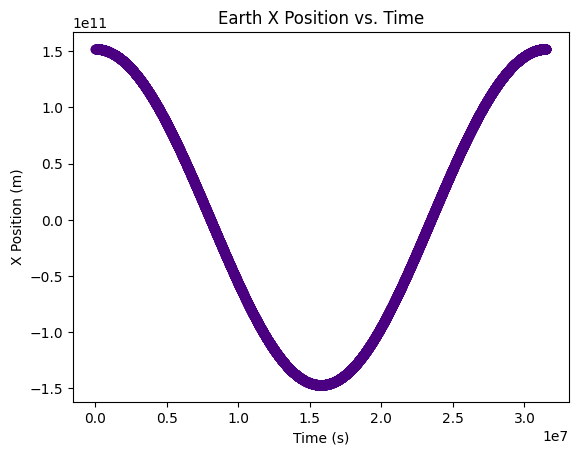

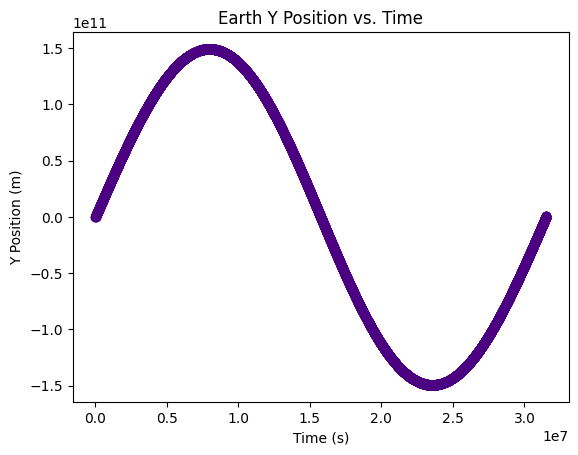

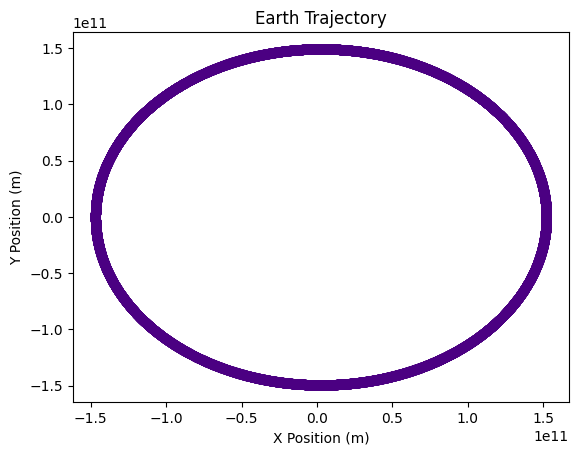

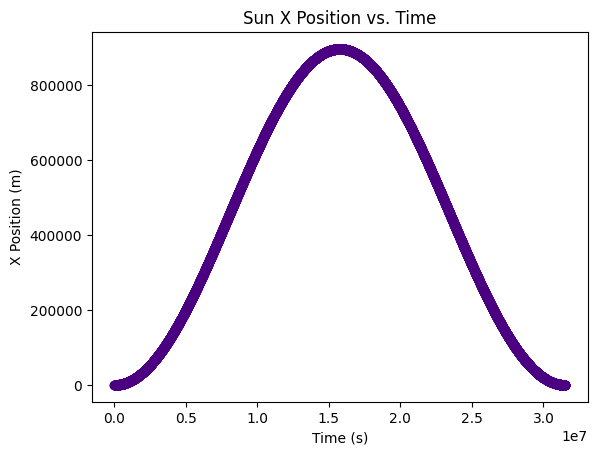

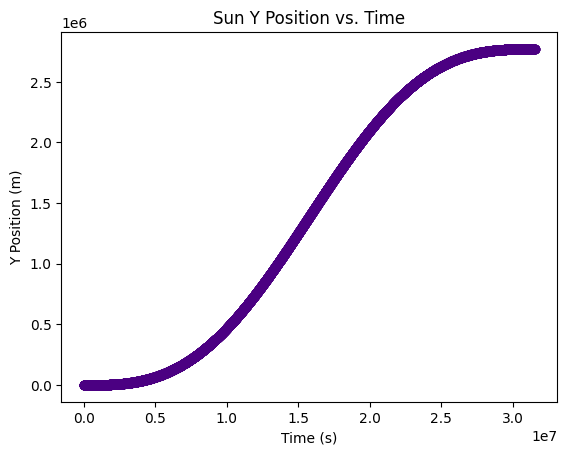

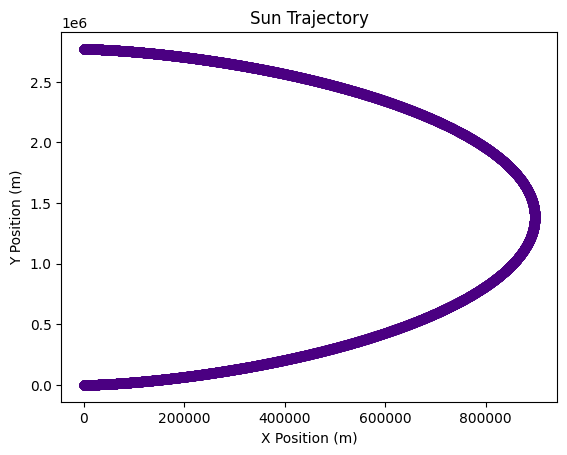

In [27]:
import numpy as np
import matplotlib.pyplot as plt

#define constants
G = 6.67E-11 # constant G
Ms = 1.9891E+30 # sun kg
Me = 5.97219E+24 # earth kg       
r_ap = 1.52E+11 # earth sun distance at aphelion m
daysec = 86400 # seconds of a day
e_ap_v = 2.929E+4 #earth velocity at aphelion in m/s


# setup the starting conditions
# earth
pos_e = np.array([r_ap, 0])
v_e = np.array([0, e_ap_v])

# sun
pos_s  = np.array([0, 0])
v_s = np.array([0, 0])

#time
t = 0 
dt = daysec / 24

#position lists
xelist = [pos_e[0]]
yelist = [pos_e[1]]
xslist = [pos_s[0]]
yslist = [pos_s[1]]
tlist = [t]

def Gravity(m1, m2, pos1, pos2):
    r = pos2 - pos1 #setting up radius vector (from object 2 to object 1)
    rmag = np.linalg.norm(r) #normalizes the radius vector, gives us magnitude 
    rhat = r / rmag #unit vector for radius
    
    #define force object 2 exerts on object 1
    Force = G * m1 * m2 * (1 / rmag ** 2) * rhat

    return Force

# start simulation
while t < daysec * 365:    
    #update position for Earth    
    Fse = Gravity(Me, Ms, pos_e, pos_s)
    a_e = Fse / Me
    v_e = v_e + a_e * dt
    pos_e = pos_e + v_e * dt 
    
    # save the position in list
    xelist.append(pos_e[0])
    yelist.append(pos_e[1])
    
    #Define the force of the Earth on the Sun (Hint: Think back to Newton's Laws)
    Fes = -Fse

    #update position for Sun
    a_s = Fes / Ms
    v_s = v_s + a_s * dt
    pos_s = pos_s + v_s * dt 
    
    # save the position in list
    xslist.append(pos_s[0])
    yslist.append(pos_s[1])
    
    # update dt
    t += dt
    tlist.append(t)

#graphs! Challenge is to construct one figure with position vs time (x and y) for sun and earth and two trajectory graphs
#that's 6 graphs in one figure

plt.scatter(tlist, xelist, color='indigo');   # this makes a scatterplot!
plt.xlabel("Time (s)") # x is time
plt.ylabel("X Position (m)") # y is height
plt.title("Earth X Position vs. Time") # plt

plt.show()

plt.scatter(tlist, yelist, color='indigo');   # this makes a scatterplot!
plt.xlabel("Time (s)") # x is time
plt.ylabel("Y Position (m)") # y is height
plt.title("Earth Y Position vs. Time") # plt

plt.show()

plt.scatter(xelist, yelist, color='indigo');   # this makes a scatterplot!
plt.xlabel("X Position (m)") # x is time
plt.ylabel("Y Position (m)") # y is velocity
plt.title("Earth Trajectory") # title

plt.show()

plt.scatter(tlist, xslist, color='indigo');   # this makes a scatterplot!
plt.xlabel("Time (s)") # x is time
plt.ylabel("X Position (m)") # y is height
plt.title("Sun X Position vs. Time") # plt

plt.show()

plt.scatter(tlist, yslist, color='indigo');   # this makes a scatterplot!
plt.xlabel("Time (s)") # x is time
plt.ylabel("Y Position (m)") # y is height
plt.title("Sun Y Position vs. Time") # plt

plt.show()

plt.scatter(xslist, yslist, color='indigo');   # this makes a scatterplot!
plt.xlabel("X Position (m)") # x is time
plt.ylabel("Y Position (m)") # y is velocity
plt.title("Sun Trajectory") # title

plt.show()